In [16]:
import utils as ut
import receiverClass as rc
import senderClass as sc
import time
import matplotlib.pyplot as plt
from numba import jit, uint64

In [20]:
bob = rc.receiver()
alice = sc.sender()

n_list = []
time_list = []

for i in range(20, 30):
    bob.p = ut.generate_prime_bits(i)
    bob.q = ut.generate_prime_bits(i)

    # set value of e and n for both sender and receiver 
    bob.e = ut.generate_e(bob.p,bob.q)
    bob.n = bob.p * bob.q

    alice.e = bob.e
    alice.n = bob.n

    n_list.append(bob.n)
    M = "Nada"
    start = time.time()
    cipher_text= alice.encrypt(M)  
    time_list.append(time.time_ns() - start)

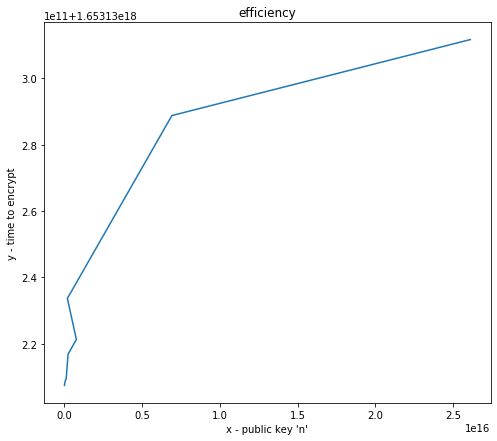

In [21]:
#ploting
plt.figure(figsize=(8,7))
plt.plot(n_list, time_list)

plt.xlabel('x - public key \'n\'')
plt.ylabel('y - time to encrypt')
plt.title('efficiency')

plt.show()